<a href="https://colab.research.google.com/github/Stergios-Konstantinidis/CAA/blob/main/Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import time as zzz
import pandas
import random
from datetime import datetime, timedelta, time

from google.colab import auth
auth.authenticate_user()
print('Authenticated')


from google.cloud import bigquery
# Construct a BigQuery client object.
project_id = 'sbb-project-2023'
client = bigquery.Client(project = project_id)



verboser = True
verbose_advanced = True

def verbose(text:str, verboser = verboser):
  if verboser == True:
    print(text)
  else:
    pass

Authenticated


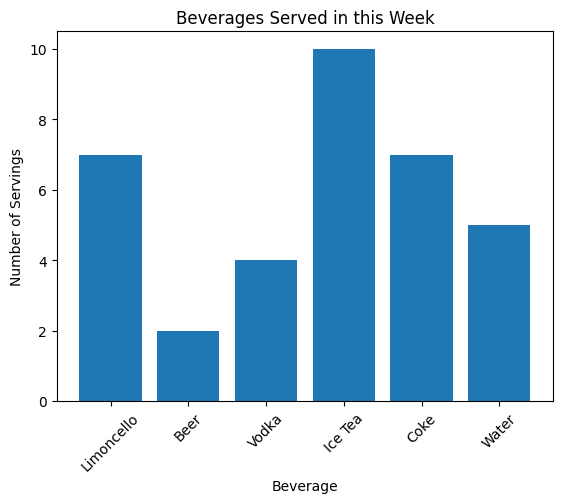

In [2]:
import matplotlib.pyplot as plt

def drinksServedThisWeek():
    q1 = """SELECT 
    beveragename,
    COUNT(beverage_idbeverage) as num
    FROM `sbb-project-2023.projetalcohol.beverage_served`bs 
    LEFT JOIN `sbb-project-2023.projetalcohol.beverage` b on bs.beverage_idbeverage = b.idbeverage
    WHERE beverage_serveddate >= CURRENT_DATE() - 7
    GROUP BY beveragename
    LIMIT 10"""
    query_job = client.query(q1)
    dataframe = query_job.to_dataframe()

    # Plotting the graph
    plt.bar(dataframe['beveragename'], dataframe['num'])
    plt.xlabel('Beverage')
    plt.ylabel('Number of Servings')
    plt.title('Beverages Served in this Week')
    plt.xticks(rotation=45)
    plt.show()

drinksServedThisWeek()

In [3]:
#THE MOST SERVED DRINK TODAY
def MostServedDrinkToday():
  q2 = """SELECT 
beveragename 
,COUNT(beverage_idbeverage) as num
FROM `sbb-project-2023.projetalcohol.beverage_served`bs 
LEFT JOIN `sbb-project-2023.projetalcohol.beverage` b on bs.beverage_idbeverage = b.idbeverage
WHERE beverage_serveddate = CURRENT_DATE()
GROUP BY beveragename
ORDER BY num DESC
LIMIT 1"""
  query_job = client.query(q2)
  return query_job.to_dataframe()

MostServedDrinkToday()

,beveragename,num
0,Ice Tea,2


In [4]:
#WHO HAD THE MOST BEERS PAST WEEK (TOP 3)
def MostBeersPastWeek():
  q3 = """SELECT 
campus_cardfirstname
,COUNT(beverage_idbeverage) as num_beers
FROM `sbb-project-2023.projetalcohol.beverage_served`bs 
LEFT JOIN `sbb-project-2023.projetalcohol.campus_card` cc on cc.idcampus_card = bs.campus_card_idcampus_card
WHERE bs.beverage_serveddate >= CURRENT_DATE() - 7
AND beverage_idbeverage = 13251
GROUP BY campus_cardfirstname
order by num_beers desc
LIMIT 3"""
  query_job = client.query(q3)
  return query_job.to_dataframe()

MostBeersPastWeek()

,campus_cardfirstname,num_beers
0,Stergios test,2
1,Michaela,1


In [5]:
#who had max alcohol level this week
def maxAlcoholLevelPastWeek():
  q4 = """SELECT
alcohol_levelethanol
,campus_cardfirstname
FROM `sbb-project-2023.projetalcohol.alcohol_level` al
LEFT JOIN `sbb-project-2023.projetalcohol.campus_card` cc on al.campus_card_idcampus_card = cc.idcampus_card
WHERE alcohol_leveldate >= CURRENT_DATE() - 7
ORDER BY alcohol_levelethanol DESC
LIMIT 1"""
  query_job = client.query(q4)
  return query_job.to_dataframe()

maxAlcoholLevelPastWeek()

,alcohol_levelethanol,campus_cardfirstname
0,1.8851,Stergios test
